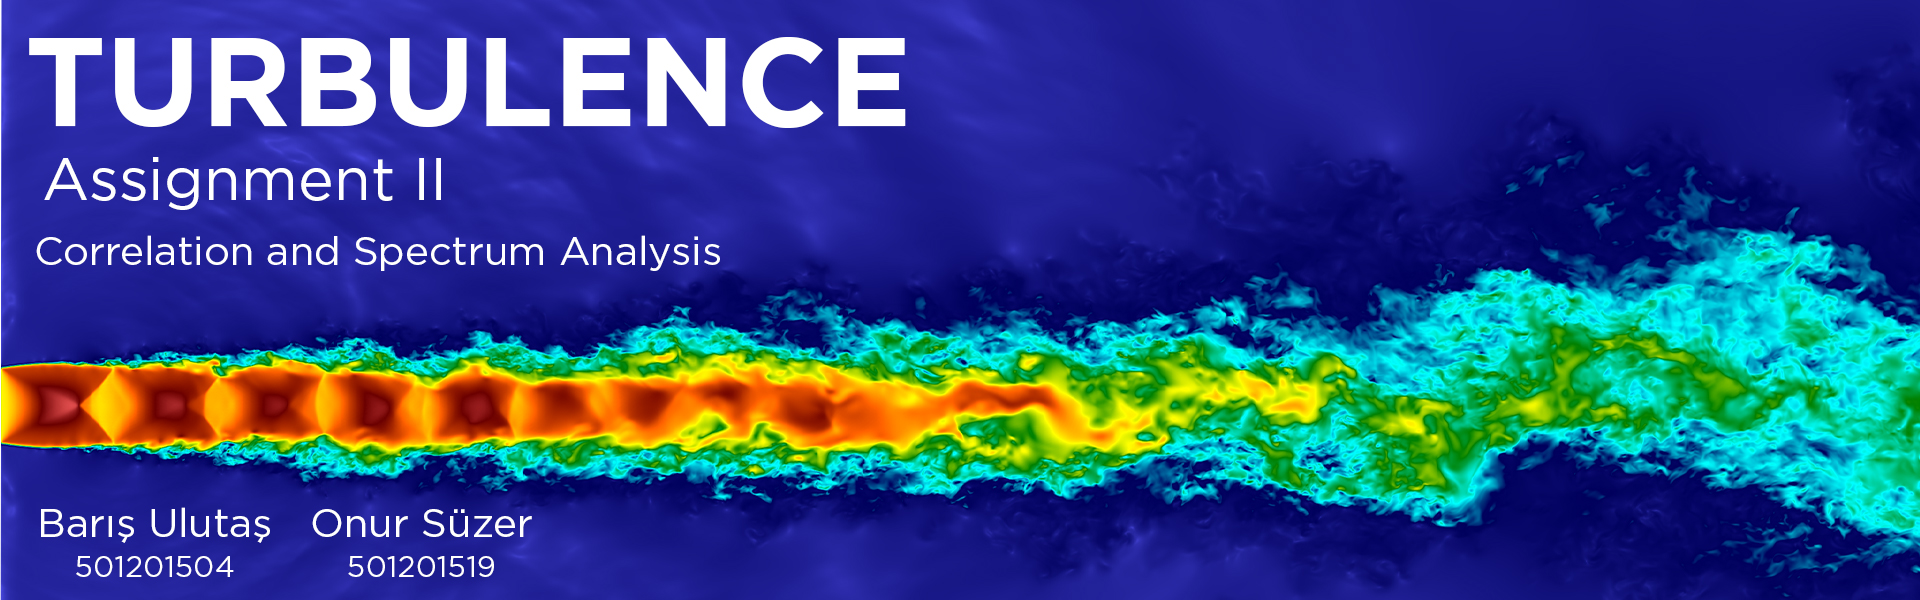

# In this Python Notebook, the question asked were answered by using the experimental data set within the scope of the Turbulence Lesson Assignment II. Some questions are solved by MATLAB and imported to notebook.

# You can view and edit the written Python code with your web browser by clicking the link below:

# https://mybinder.org/v2/gh/bulutas/TurbulenceHw2.git/HEAD

In [1]:
#Kütüphaneler yüklendi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import statsmodels.api as sm
import sympy as sym


In [2]:
dataFrame=pd.read_csv("0.05.csv") # ölçüm verisi excelden import edildi.
dataFrame1=pd.read_csv("0_1.csv")
dataFrame2=pd.read_csv("1.csv")
dataFrame3=pd.read_csv("4.csv")

In [3]:
dataFrame["LDA2 [m/s]"]=-1*dataFrame["LDA2 [m/s]"] # v doğrultusundaki hız -1 ile çarpıldı. Deney sırasında cihazın yerleşiminden kaynaklı.
dataFrame1["LDA2 [m/s]"]=-1*dataFrame1["LDA2 [m/s]"]
dataFrame2["LDA2 [m/s]"]=-1*dataFrame2["LDA2 [m/s]"]
dataFrame3["LDA2 [m/s]"]=-1*dataFrame3["LDA2 [m/s]"]
t=dataFrame["AT [ms]"]/10**3
t_1=dataFrame1["AT [ms]"]/10**3
t_2=dataFrame2["AT [ms]"]/10**3
t_3=dataFrame3["AT [ms]"]/10**3




# **1. Plot the sampled u' and v' time series obtained at the three measurement locations.**

## Velocity datasets at each measurement point were imported from source file. u' and v' were calculated by subtracting the average velocity from the instantaneous velocities and plotted as follows.

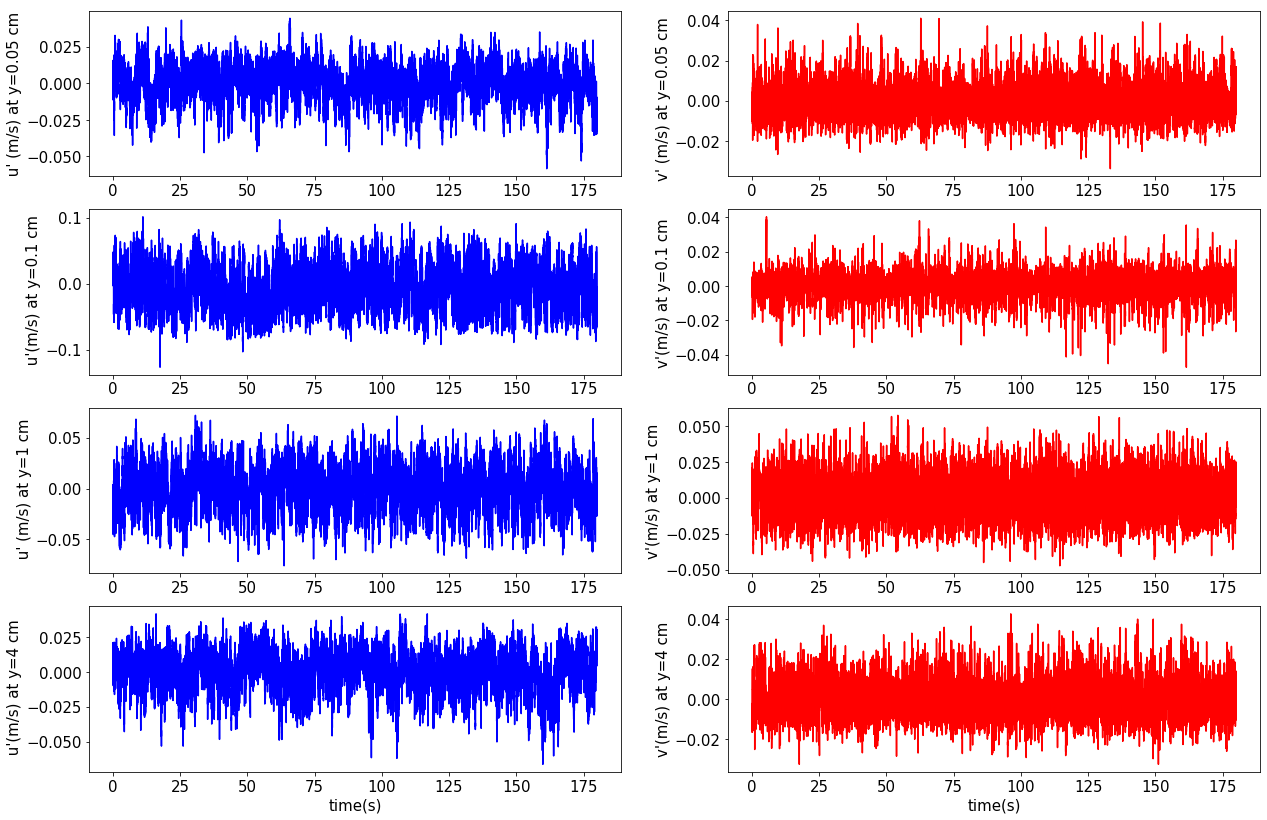

In [4]:
plt.rcParams.update({'font.size': 15})
fig, ax=plt.subplots(4,2,figsize=(21,14))

ax[0,0].plot(t, dataFrame["LDA1 [m/s]"]-dataFrame["LDA1 [m/s]"].mean(),color='b')
ax[0,1].plot(t, dataFrame["LDA2 [m/s]"]-dataFrame["LDA2 [m/s]"].mean(),color='r')
ax[1,0].plot(t_1, dataFrame1["LDA1 [m/s]"]-dataFrame1["LDA1 [m/s]"].mean(),color='b')
ax[1,1].plot(t_1, dataFrame1["LDA2 [m/s]"]-dataFrame1["LDA2 [m/s]"].mean(),color='r')
ax[2,0].plot(t_2, dataFrame2["LDA1 [m/s]"]-dataFrame2["LDA1 [m/s]"].mean(),color='b')
ax[2,1].plot(t_2, dataFrame2["LDA2 [m/s]"]-dataFrame2["LDA2 [m/s]"].mean(),color='r')
ax[3,0].plot(t_3, dataFrame3["LDA1 [m/s]"]-dataFrame3["LDA1 [m/s]"].mean(),color='b')
ax[3,1].plot(t_3, dataFrame3["LDA2 [m/s]"]-dataFrame3["LDA2 [m/s]"].mean(),color='r')
ax[0,0].set_ylabel(" u' (m/s) at y=0.05 cm ")
ax[0,1].set_ylabel("v' (m/s) at y=0.05 cm  ")
ax[1,0].set_ylabel(" u'(m/s) at y=0.1 cm")
ax[1,1].set_ylabel("v'(m/s) at y=0.1 cm")
ax[2,0].set_ylabel(" u' (m/s) at y=1 cm")
ax[2,1].set_ylabel("v'(m/s) at y=1 cm")
ax[3,0].set_ylabel(" u'(m/s) at y=4 cm")
ax[3,1].set_ylabel("v'(m/s) at y=4 cm")
ax[3,0].set_xlabel("time(s)")
ax[3,1].set_xlabel("time(s)")
plt.savefig("ylerhiz.pdf")

# **2. For this action item only, also consider results from y = 0.05 cm. Plot the PDF for the measurement locations and calculate the variance, skewness, and kurtosis. How do these compare with the normal distribution? List the skewness values versus $$y^+= yU_f /ν$$ in a table. Can you relate these to the bursting process?**

## The histogram and probability density funciton for the y=0.05 location are plotted as follows. Since the skewness and L moment values of the distribution are close to zero, we can say that the time series fit to the normal distribution.

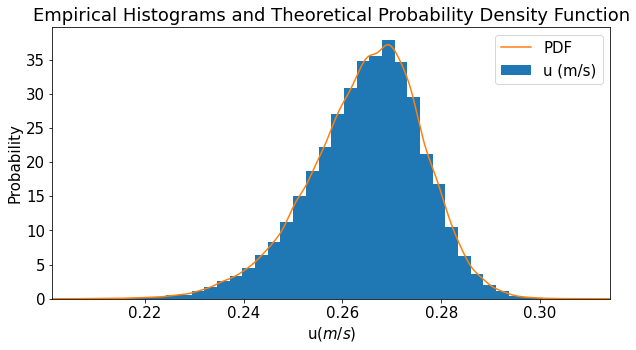

In [5]:
u = dataFrame["LDA1 [m/s]"]

plt.rcParams.update({'font.size': 15},)
plt.figure(figsize=(10,5))
plt.hist(u, density=True, bins=40, label="u (m/s)")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(u)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.ylabel('Probability')
plt.xlabel('u($m/s$)')
plt.title("Empirical Histograms and Theoretical Probability Density Function");
plt.legend()


In [6]:
data=u
#İlk önce b0 b1 b2 ve b3 olasılık ağırlıklı momentleri asaıdaki gibi hesaplanır:
def L_moment(Data):
  N=len(Data)
  b0=Data.mean();

  #b1 hesabı
  lmo=0
  i=1
  for j in Data:
    lmo=lmo+(N-i)*j/(N*(N-1))
    if i==N-1:
      break
    i=i+1
  b1=lmo;

  #b2 hesabı
  lmo=0
  i=1
  for j in Data:
    lmo=lmo+(N-i)*(N-i-1)*j/(N*(N-1)*(N-2))
    if i==N-2:
      break
    i=i+1
  b2=lmo;

  #b3 hesabı
  lmo=0
  i=1
  for j in Data:
    lmo=lmo+(N-i)*(N-i-1)*(N-i-2)*j/(N*(N-1)*(N-2)*(N-3))
    if i==N-3:
      break
    i=i+1
  b3=lmo;



  #L-momentleri olasılık ağırlıklı momentler kullanılarak aşağıdaki gibi hesaplanabilir:
  L1=b0;
  L2=2*b1-b0;
  L3=6*b2-6*b1+b0;
  L4=20*b3-30*b2+12*b1-b0;
  Lcv = L2 / L1
  Lcs = L3 / L2
  Lkurt = L4 / L2
  return [L1,L2,L3,L4]
L1=L_moment(data)[0]
L2=L_moment(data)[1]
L3=L_moment(data)[2]
L4=L_moment(data)[3]
Lcv = L2 / L1
Lcs = L3 / L2
Lkurt = L4 / L2
L_m = [L1, L2, L3, L4, Lcv, Lcs, Lkurt]
L_m_name = [ "L1", "L2", "L3", "L4", "Lcv", "Lcs", "Lkurt"]
L_moment = pd.DataFrame(data=L_m, index=L_m_name, columns=["L Moments"])
L_moment

L Moments
L1      0.264763
L2      0.000704
L3     -0.000137
L4      0.000023
Lcv     0.002658
Lcs    -0.194328
Lkurt   0.032746

In [7]:
#Csx values at y locations
Csx=dataFrame["LDA1 [m/s]"].skew()
Csx_1=dataFrame1["LDA1 [m/s]"].skew()
Csx_2=dataFrame2["LDA1 [m/s]"].skew()
Csx_3=dataFrame3["LDA1 [m/s]"].skew()
Csx=[Csx,Csx_1,Csx_2,Csx_3]

In [8]:
y=pd.Series([0.05,0.1,1,4])
y_plus=(y*1.31)/10**-2

In [9]:
u_mean = dataFrame["LDA1 [m/s]"].mean()
u_mean1 = dataFrame1["LDA1 [m/s]"].mean()
u_mean2 = dataFrame2["LDA1 [m/s]"].mean()
u_mean3 = dataFrame3["LDA1 [m/s]"].mean()
u_mean_frame = pd.DataFrame([u_mean,u_mean1,u_mean2,u_mean3], columns=["u_mean_values"], index = y)
u_mean_frame

u_mean_values
0.05       0.264763
0.10       0.133493
1.00       0.209142
4.00       0.259977

In [10]:
Tableskewness=pd.DataFrame()
Tableskewness["y^+"]=y_plus
Tableskewness["Csx"]=Csx
Tableskewness.set_index(y)


y^+       Csx
0.05    6.55 -0.494118
0.10   13.10 -0.168669
1.00  131.00 -0.096364
4.00  524.00 -0.488407

In [11]:
u_dash=dataFrame["LDA1 [m/s]"]-dataFrame["LDA1 [m/s]"].mean()
u_dash1=dataFrame1["LDA1 [m/s]"]-dataFrame1["LDA1 [m/s]"].mean()
u_dash2=dataFrame2["LDA1 [m/s]"]-dataFrame2["LDA1 [m/s]"].mean()
u_dash3=dataFrame3["LDA1 [m/s]"]-dataFrame3["LDA1 [m/s]"].mean()
v_dash=dataFrame["LDA2 [m/s]"]-dataFrame["LDA2 [m/s]"].mean()
v_dash1=dataFrame1["LDA2 [m/s]"]-dataFrame1["LDA2 [m/s]"].mean()
v_dash2=dataFrame2["LDA2 [m/s]"]-dataFrame2["LDA2 [m/s]"].mean()
v_dash3=dataFrame3["LDA2 [m/s]"]-dataFrame3["LDA2 [m/s]"].mean()




# **3. Plot the correlation functions for the three measurement locations.**

## The correlation graphs for each lag of the time series are drawn as follows.

In [12]:
# Cor. Function

x=np.log(np.arange(1,42))

corr=sm.tsa.acf(u_dash)
corr

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.88580198, 0.87547786, 0.86133894, 0.84486445,
       0.82832895, 0.81140067, 0.79434264, 0.77676975, 0.76095493,
       0.74444367, 0.72905399, 0.71311413, 0.70025902, 0.68665463,
       0.67320444, 0.66146961, 0.6501268 , 0.6379489 , 0.6277427 ,
       0.618505  , 0.60801441, 0.5990609 , 0.58930658, 0.58048676,
       0.57189376, 0.56313161, 0.5545124 , 0.54749342, 0.5393604 ,
       0.53140386, 0.52398424, 0.51683585, 0.50917976, 0.5031423 ,
       0.49623894, 0.48987459, 0.48388441, 0.47818632, 0.47116263,
       0.4664875 ])

# 4. Work out time micro/macro scales of turbulence from the correlation data and plot them as a function of the distance from the bottom.

In [13]:
# Function to find out Lambda values for micro scales

def micro(data):
  drv = []
  for i in range (1,len(data)):
    fark = data[i]-data[i-1]
    drv.append(fark)
  
  drv=pd.Series(drv)

  lmb = ((2*((data**2).mean()))/((drv**2).mean()))**0.5
  return lmb

In [14]:
# Lambda values for micro scales


# Import curve fitting package from scipy
from scipy.optimize import curve_fit


# Function to calculate the exponential with constants a and b
def exponential(x, a,c):
    return a*np.exp(x) + c


x_udash = np.linspace(0,np.log(micro(u_dash)),20)
y_udash = exponential(x_udash,-0.5,1.5)

x_udash1 = np.linspace(0,np.log(micro(u_dash1)),20)
y_udash1 = exponential(x_udash,-0.5,1.5)

x_udash2 = np.linspace(0,np.log(micro(u_dash2)),20)
y_udash2 = exponential(x_udash,-0.5,1.5)

x_udash3 = np.linspace(0,np.log(micro(u_dash3)),20)
y_udash3 = exponential(x_udash,-0.5,1.5)



D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  war

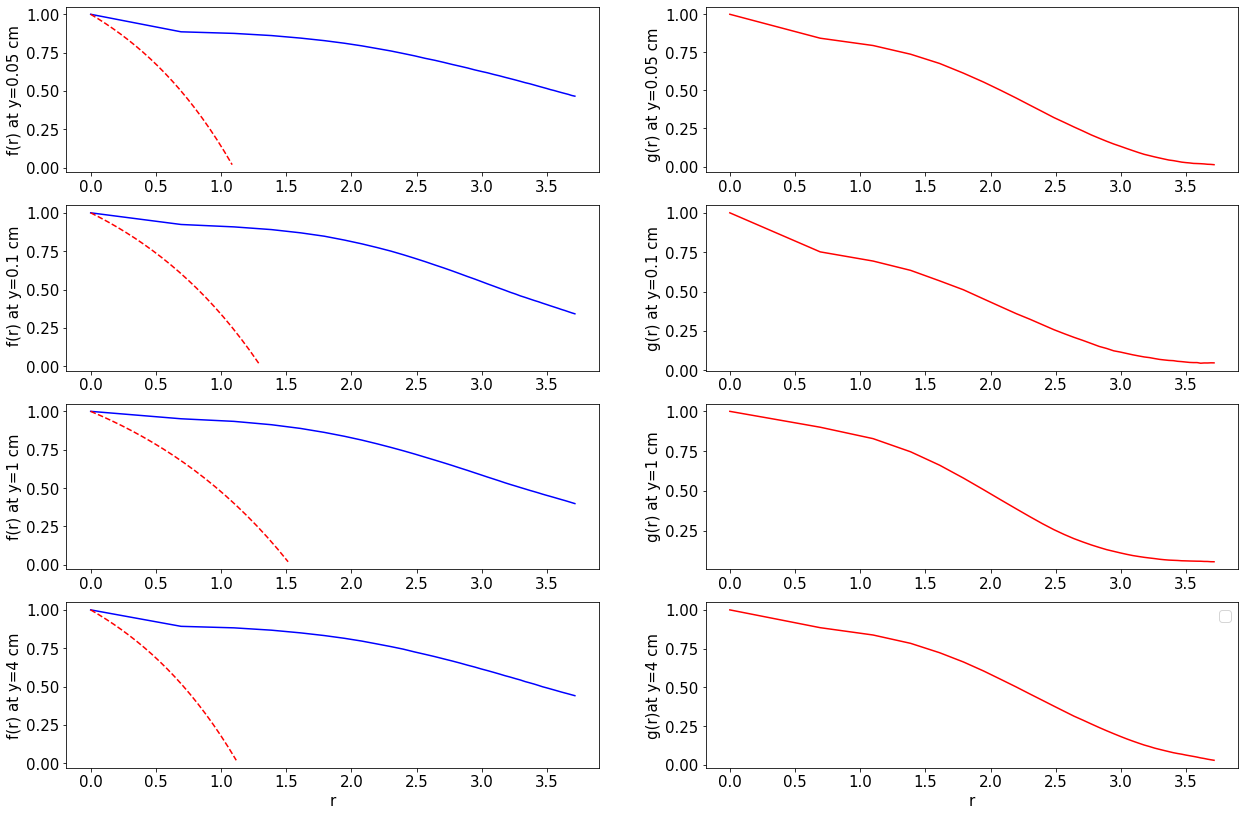

In [15]:
plt.rcParams.update({'font.size': 15})
fig, ax=plt.subplots(4,2,figsize=(21,14))

ax[0,0].plot(x,sm.tsa.acf(u_dash),color='b')
ax[0,0].plot(x_udash,y_udash,'r--')
ax[0,1].plot(x,sm.tsa.acf(v_dash),color='r')

ax[1,0].plot(x,sm.tsa.acf(u_dash1),color='b')
ax[1,0].plot(x_udash1,y_udash1,'r--')
ax[1,1].plot(x,sm.tsa.acf(v_dash1),color='r')

ax[2,0].plot(x,sm.tsa.acf(u_dash2),color='b')
ax[2,0].plot(x_udash2,y_udash2,'r--')
ax[2,1].plot(x,sm.tsa.acf(v_dash2),color='r')

ax[3,0].plot(x,sm.tsa.acf(u_dash3),color='b')
ax[3,0].plot(x_udash3,y_udash3,'r--')
ax[3,1].plot(x,sm.tsa.acf(v_dash3),color='r')



ax[0,0].set_ylabel(" f(r) at y=0.05 cm ")
ax[0,1].set_ylabel("g(r) at y=0.05 cm  ")
ax[1,0].set_ylabel(" f(r) at y=0.1 cm")
ax[1,1].set_ylabel("g(r) at y=0.1 cm")
ax[2,0].set_ylabel("f(r) at y=1 cm")
ax[2,1].set_ylabel("g(r) at y=1 cm")
ax[3,0].set_ylabel("f(r) at y=4 cm")
ax[3,1].set_ylabel("g(r)at y=4 cm")
ax[3,0].set_xlabel("r")
ax[3,1].set_xlabel("r")
plt.legend()
plt.savefig("corfunc.pdf")

In [16]:
# Function to integrate correlation function for Lambda values in macro scales

from scipy import integrate

def lmb_int(data):

  x = np.arange(len(sm.tsa.acf(data)))
  y = sm.tsa.acf(data)
  a = np.trapz(y, x)
  return a
  


In [17]:
# Macro scales Lambda Values for :

lmb_udash = lmb_int(u_dash)
lmb_udash1 = lmb_int(u_dash1)
lmb_udash2 = lmb_int(u_dash2)
lmb_udash3 = lmb_int(u_dash3)

lmb_int_frame = pd.DataFrame([lmb_udash,lmb_udash1,lmb_udash2,lmb_udash3], columns=["Lambda_F"], index= y )
lmb_int_frame

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Lambda_F
0.05  25.772200
0.10  23.221701
1.00  24.615152
4.00  25.294135

# **5. Making use of Taylor’s frozen turbulence approximation, work out the macro length scale of turbulence, and plot it as a function of the distance from the bottom.**

In [18]:
def T_e(data,ort):
  T_e = lmb_int(data) / ort
  return T_e

In [19]:
# Table for T_E

T_e_Frame = pd.DataFrame([T_e(u_dash, u_mean),T_e(u_dash1, u_mean1),T_e(u_dash2, u_mean2),T_e(u_dash3, u_mean3)], columns = ["T_E Values"], index=y)
T_e_Frame

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


T_E Values
0.05   97.340465
0.10  173.954056
1.00  117.696114
4.00   97.293869

# **6. Plot the u ′ and v ′ energy density spectra on log-log paper for the measurement locations.**

## The energy density spectra were plotted with the shared matlab script.

For y = 0.1 cm

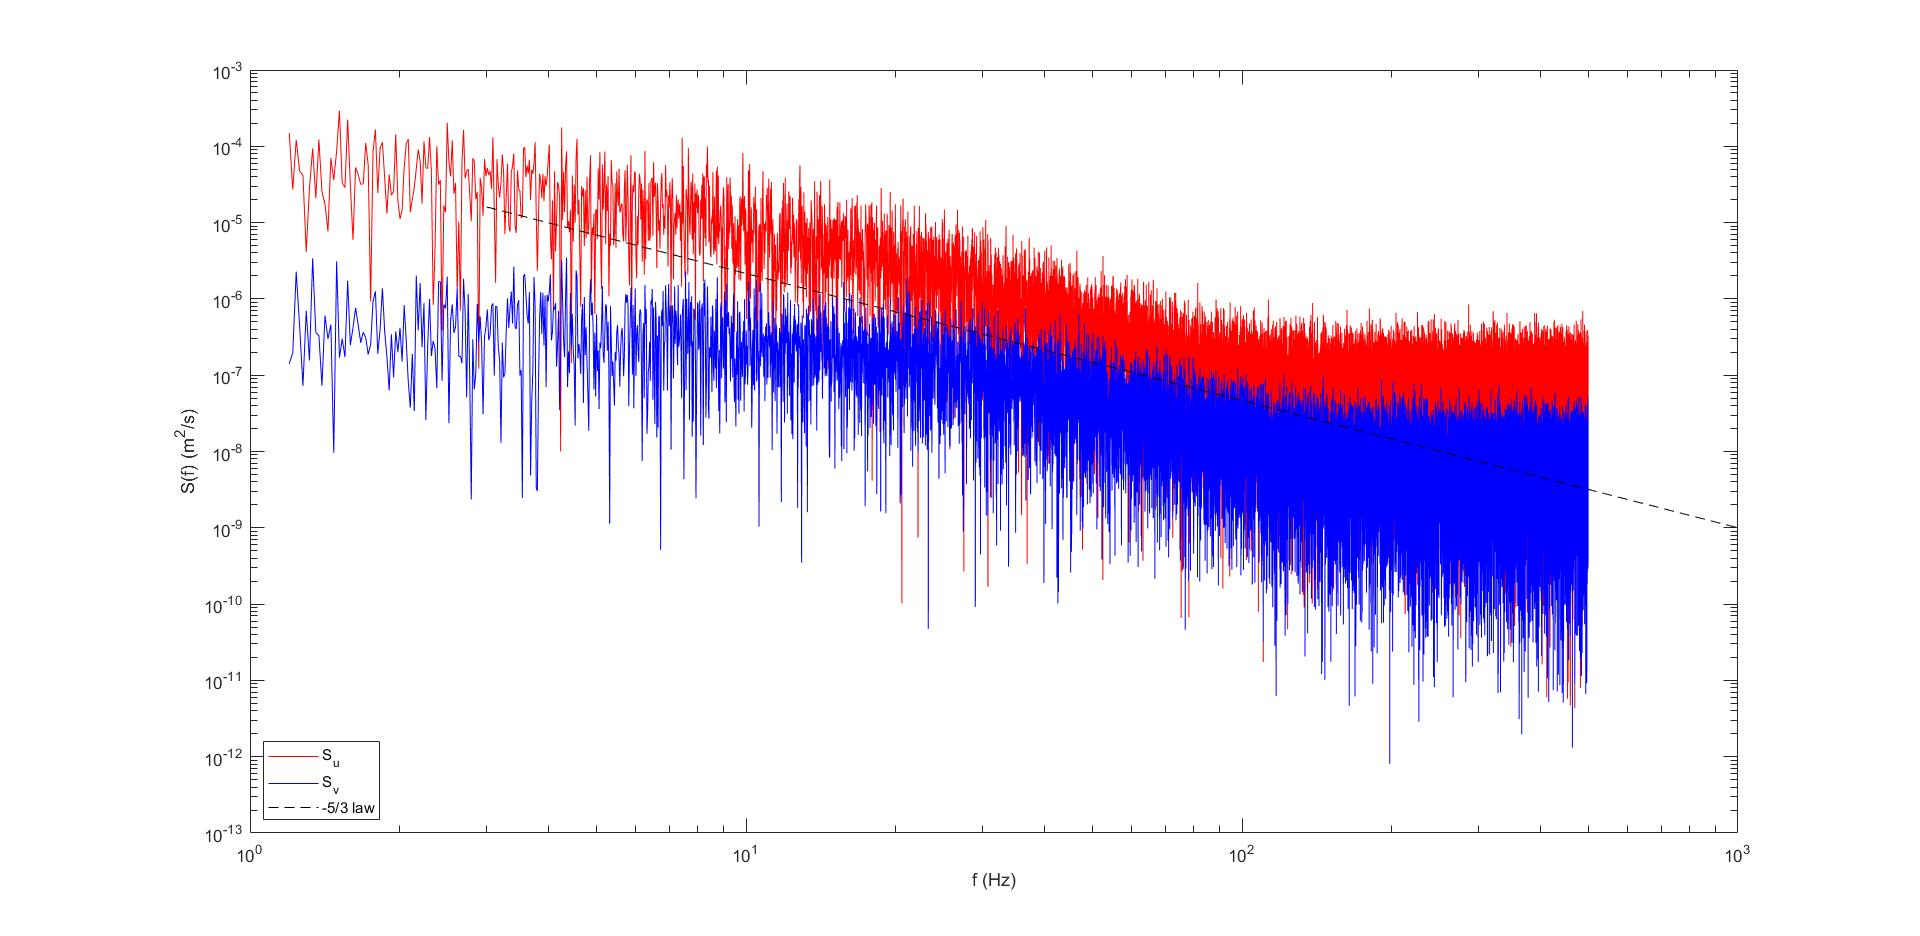

For y = 1cm

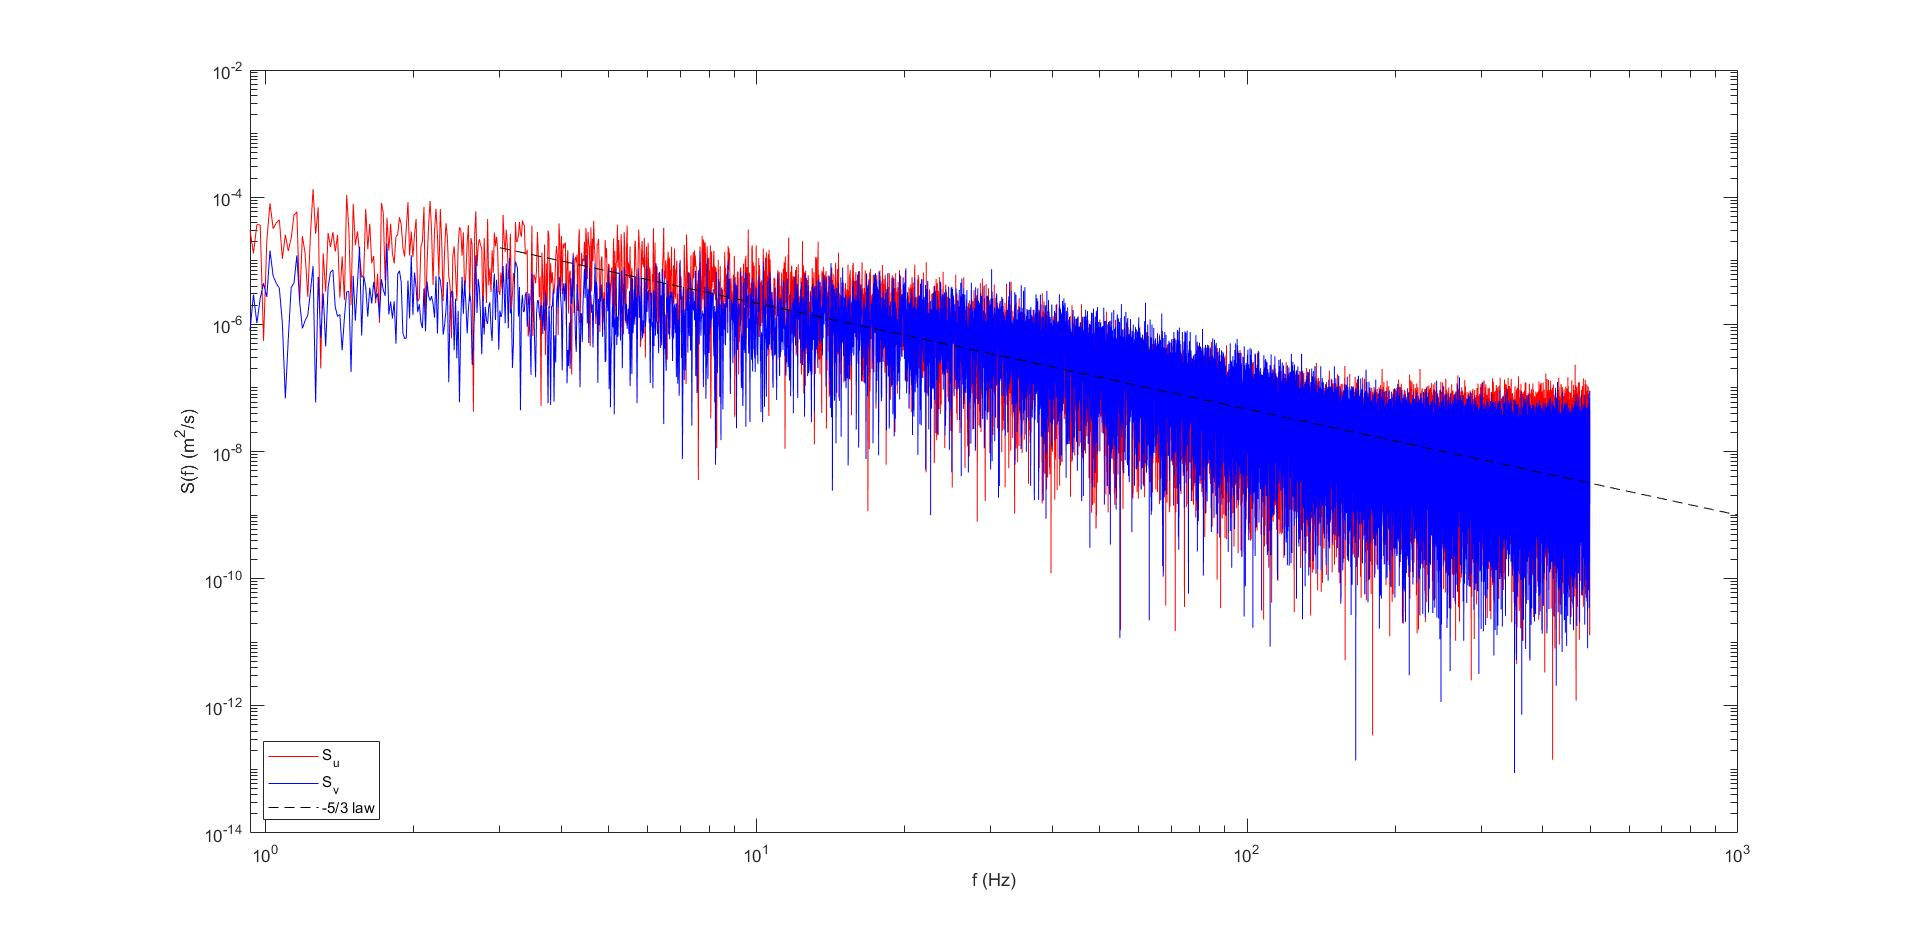

For y = 4 cm

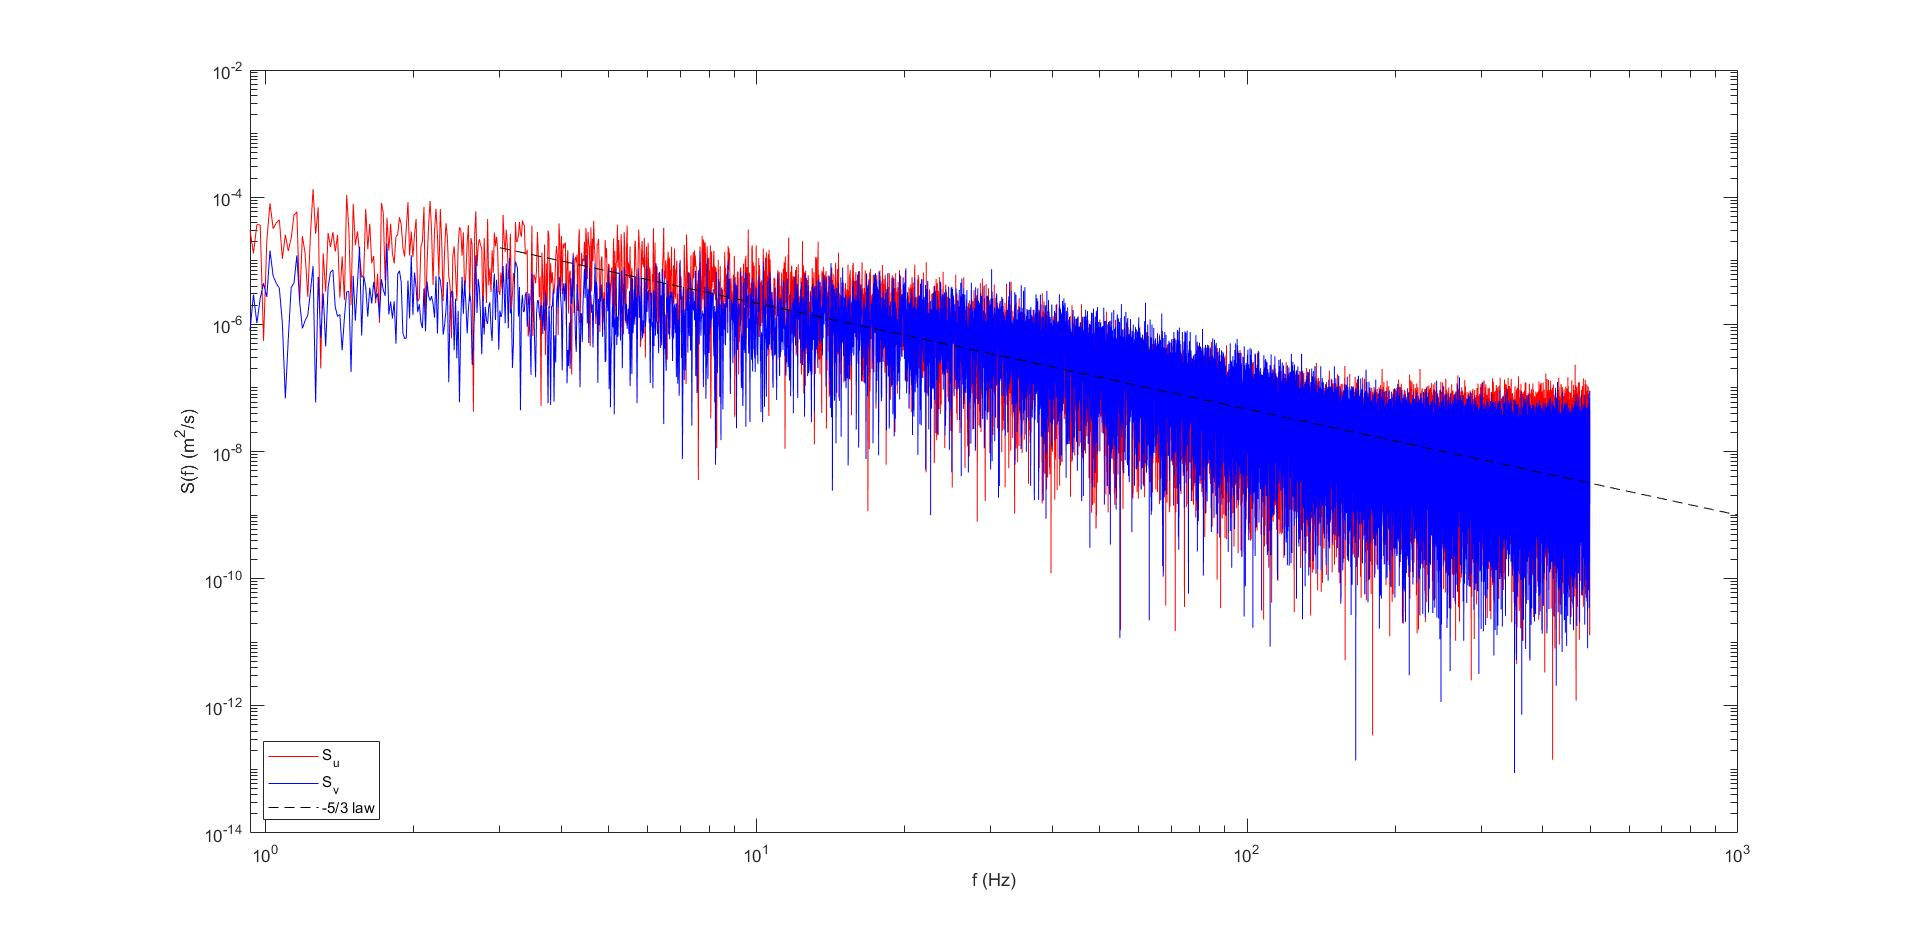

# **7. Identify the energy containing range, the inertial subrange, and the universal equilibrium range on the plots.**

In [20]:
k_Frame = pd.DataFrame([2*np.pi/micro(u_dash),2*np.pi/micro(u_dash1),2*np.pi/micro(u_dash2),2*np.pi/micro(u_dash3)],columns=["k"],index=y)
k_Frame["logaritmik"] = np.log10(k_Frame["k"])
k_Frame["cont_range"] = np.log10(k_Frame["k"]+(k_Frame["k"]**(-5/3)))

In [21]:
k_Frame

k  logaritmik  cont_range
0.05  2.122946    0.326939    0.381677
0.10  1.732272    0.238616    0.328889
1.00  1.382057    0.140526    0.293411
4.00  2.057355    0.313309    0.372514

For y = 0.1 cm

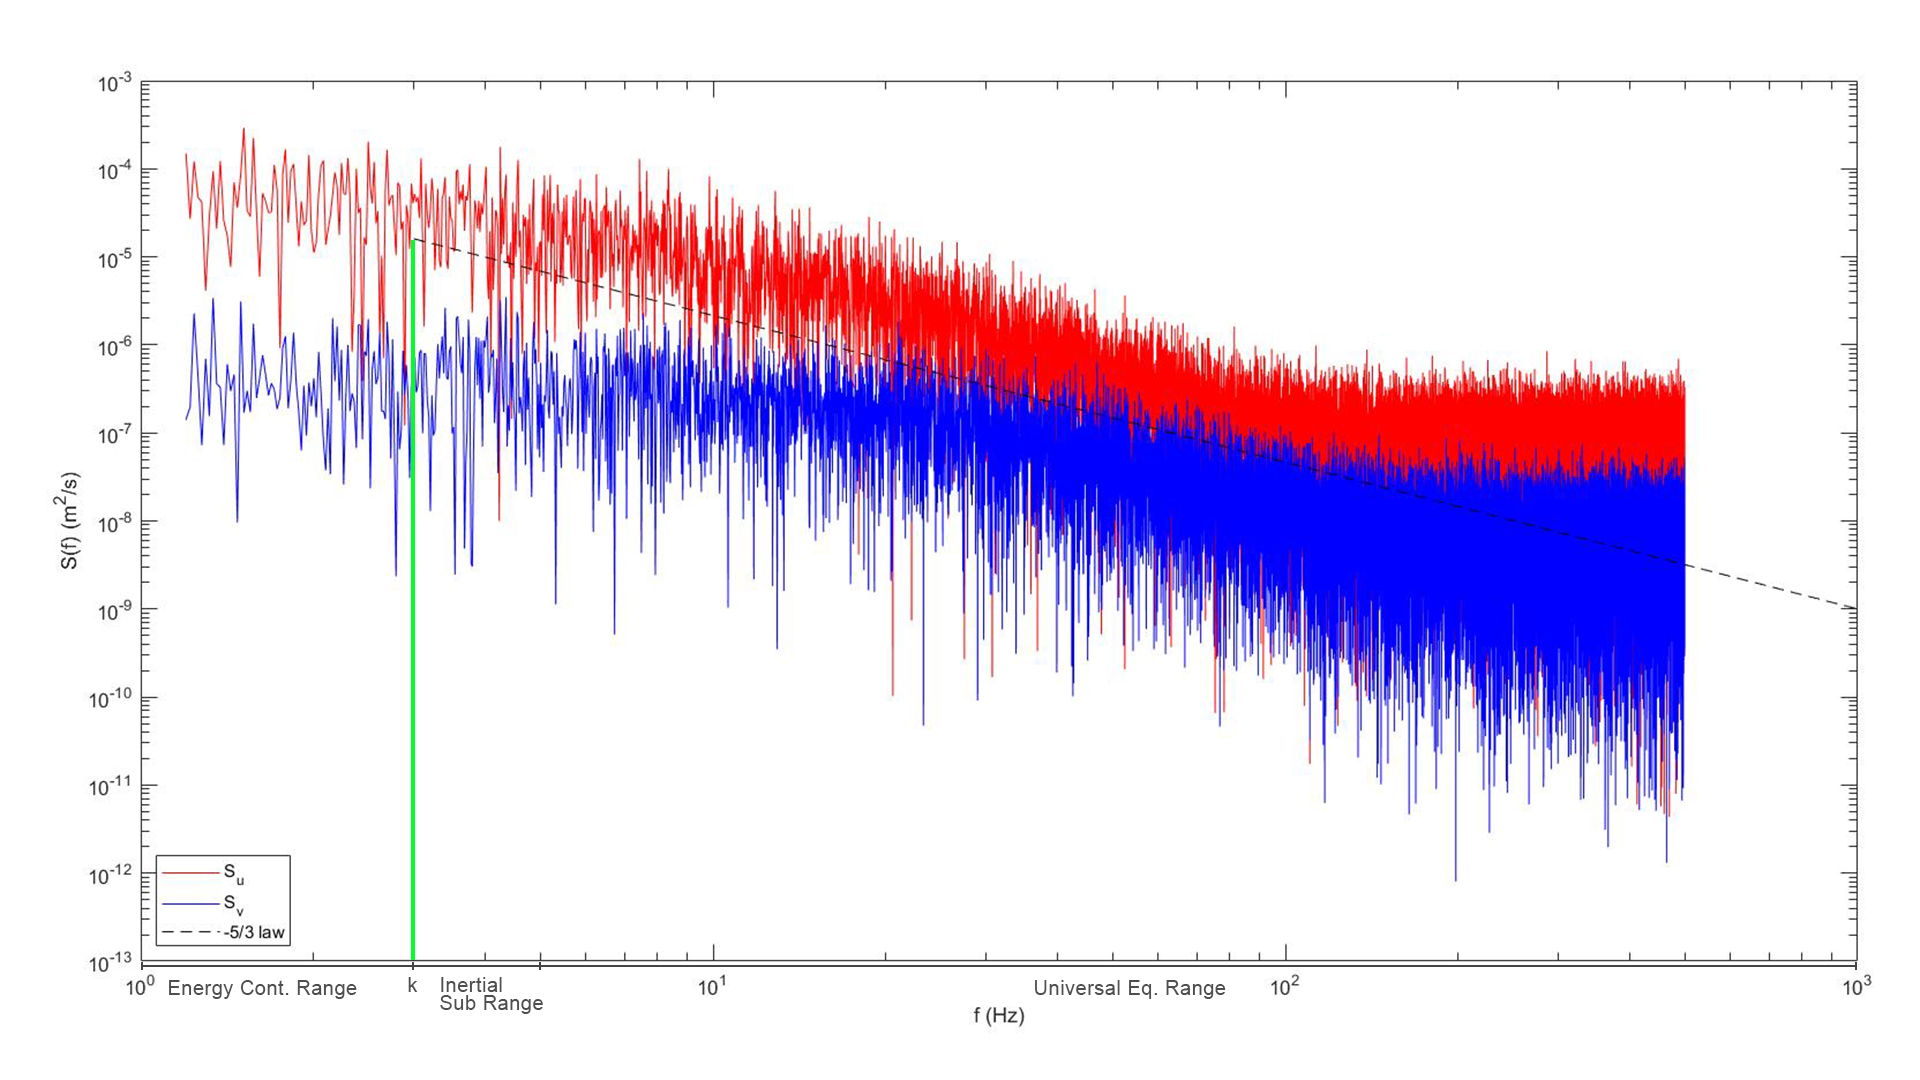

For y = 1 cm

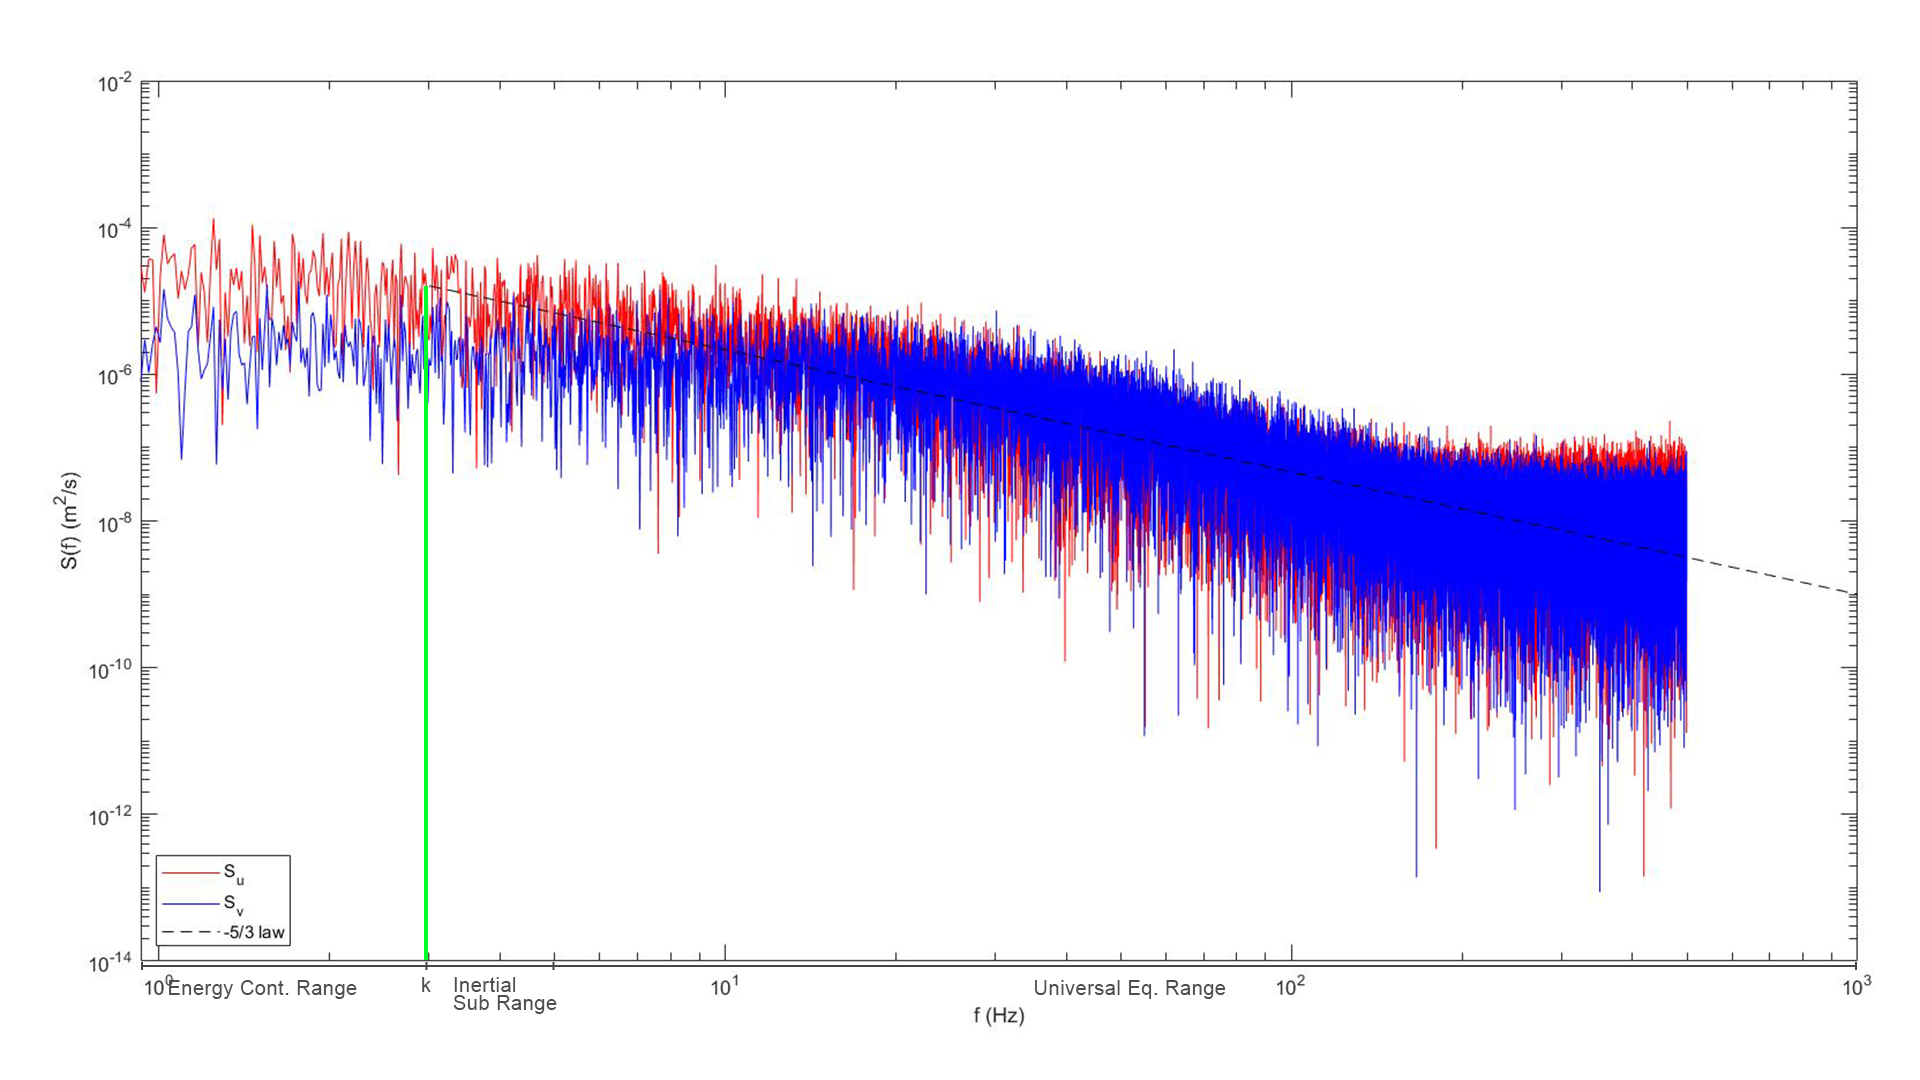

For y = 4 cm

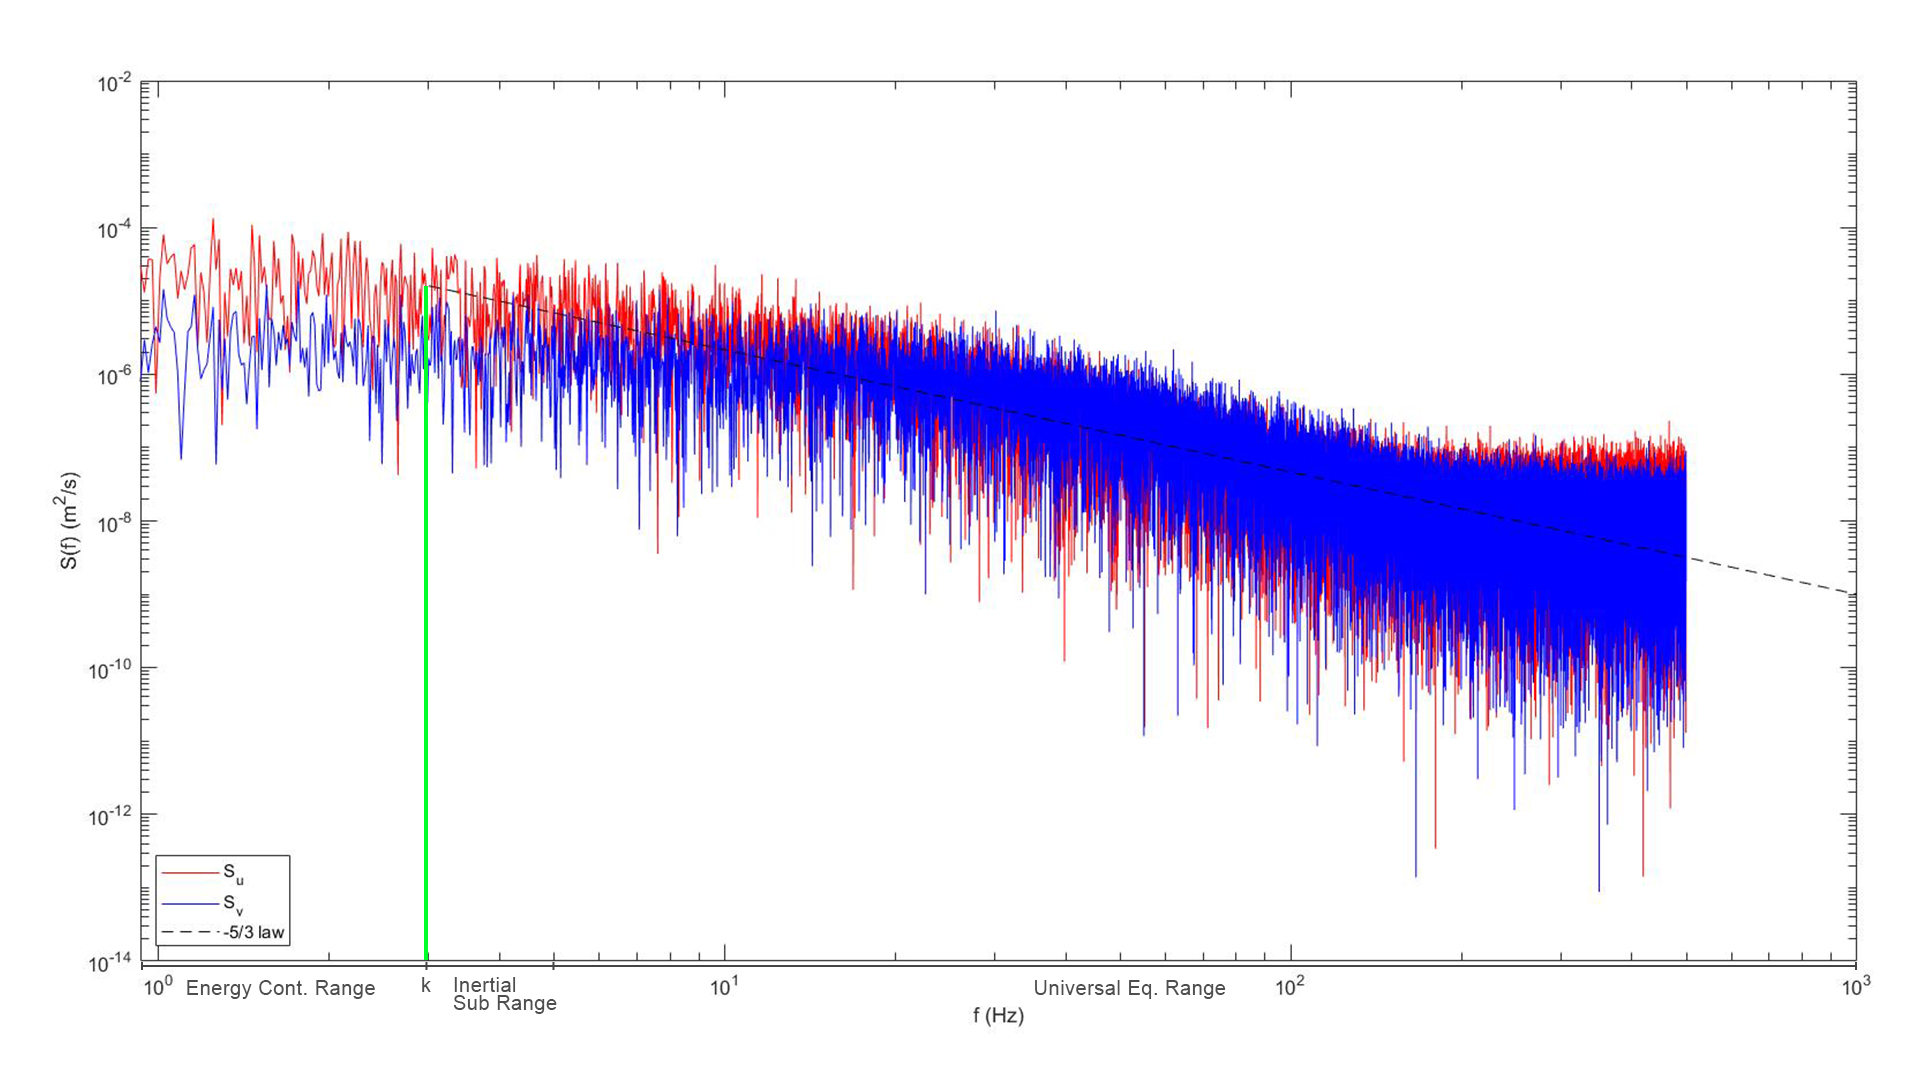

# **8. Find the range of frequencies which contribute 80% of the total energy. Examine its variation with respect to the distance from the bottom.**

## In the spectral analysis, frequencies corresponding to 80 percent of the energy were calculated.

In [22]:
from scipy import integrate

def int_k(data):

  x = np.linspace(0,10**6,len(data))
  y = 0.5*(data**2)
  toplam_alan = np.trapz(y, x)
  
  
  for i in range(0,len(data)):
    if np.trapz(y[0:i],x[0:i]) >= toplam_alan*0.8:
      k_son = i
      break

  return x[i]

In [ ]:
yuzdeseksen_enerji = [np.log10(int_k(u_dash1)),np.log10(int_k(u_dash2)),np.log10(int_k(u_dash3))]

In [ ]:
enerji_tablo = pd.DataFrame(yuzdeseksen_enerji, columns= ["k values for 80 percent of total energy"], index = y[1:])
enerji_tablo